# 데이터 가공 및 시각화
- 1. 전처리
    - 결측값 처리: 단순대치, 평균 대치, 단순확률 대치 (Hot-deck, nearest neighbor), 다중 대치, knnImputation, centralimputation
    - 클래스불균형: 업샘플링 (SMOTE, Boaderline SMOTE, Adasyn), 다운샘플링
    - 이상값 처리: 극단값 절단, 조정
    - 변수 변환, 스케일링: 수치형 변수 변환(로그변환, 제곱근변환, 지수변환, 제곱변환, Box-cox 변환, 표준화, 정규화), 범주형 변수 변환(범주형 변수 인코딩, 대규모 범주형 변수처리), 날짜 및 변수 변환,  피쳐스케일링
    - 원핫인코딩(더미변수), 컬럼 트랜스퍼, 구간분할, 이산화, 피쳐선택
- 2. 표본 추출: 단순랜덤 추출법, 계통추출법, 집락추출법, 층화추출법
- 3. 데이터 분할: 구축/검정/시험용, 홀드아웃방법, 교차확인방법 (10 fold 교차분석), 부트스트랩
- 4. 그래프 그리기:
    - 산점도, 막대그래프, 선그래프, 히트맵, 서브플롯, 트리맵, 도넛차트, 버블차트, 히스토그램, 체르노프 페이스, 스타차트, 다차원척도법, 평행좌표계
    - 도식화와 시각화


# 1. 전처리

## 1. 0 결측치의 종류
- 완적 무작위 결측(MCAR: Missing Completely at Random)
    - 변수 상에서 발생한 결측치가 다른 변수들과 아무런 상관이 없는 경우 ex) 데이터를 입력하는 사람이 깜빡하고 입력을 안하거나 전산오류로 누락
- 무작위 결측(MAR: Missing at Random)
    - 누락된 자료가 특정 변수와 관련되어 일어나지만, 그 변수의 결과는 관계가 없는 경우. 그리고 누락이 전체 정보가 있는 변수로 설명될 수 있음 ex) 남성은 우울증 설문 조사에 기입할 확률이 낮지만 우울함의 정도와는 상관이 없는 경우
- 비 무작위 결측(MNAR: Missing at not random)
    - 위 두가지 유형이 아닌 경우. 누락된 값(변수의 결과)이 다른 변수와 연관 있는 경우 의미. ex) 만약 남성이 우울증 설문 조사에 기입하는 게 우울증의 정도와 관련이 있을 때
    
# 결측치 가이드라인
- 10% 미만: 삭제 or 대치
- 10 ~ 20%: Hot deck(매년 자료->해당 년 자료 추정) or regression or model based imputation
- 20 ~ 50% 이상: regression or model based imputation
- 50% 이상: 해당 컬럼(변수) 자체 제거

## 1. 1 결측값 처리
- 학습을 할 때 결측치가 존재하면 학습이 안 되기 때문에 다양한 방법으로 처리함
### 결측치를 다루는 2가지의 큰 방식
    - 1) 제거하기&삭제하기(Deletion)
    - 2) 채우기&보간하기(Imputation)
- 제거하기
    - A. 목록 삭제(Listwise)
        - 결측치가 존재하는 전체 행을 삭제
    - B. 단일값 삭제(Pairwise)
        - 손실된 관측치 자체만 삭제하고, 다른 변수가 존재하는 경우 그대로 유지
    - 삭제하는 두 가지 방법 모두 정보가 손실.
    - 특히나 목록 삭제는 단일값 삭제와 비교했을 때 최대치의 정보 손실 발생
    - 단일값 삭제의 문제점은 항상 사용할 수 없고, 매번 샘플이 다르기 때문에 분석 비교 어려움

In [1]:
import pandas as pd
import numpy as np

In [15]:
dict = {'First Score':[100, 90, np.nan, 95],
       'Second Score':[30, np.nan, 45, 56],
       'Third Score':[52, 40, 80, 98],
       'Fourth Score':[np.nan, np.nan, np.nan, 65]}
df = pd.DataFrame(dict)
df.head()

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52,NaN
1,90.0,NaN,40,NaN
2,NaN,45.0,80,NaN
3,95.0,56.0,98,65.0


In [5]:
# 1) Listwise 방식으로 제거하기: 목록 삭제
## 행(로우) 기준으로 삭제하기: 디폴트
df.dropna()
# df.dropna(axis=0, how='any') 같은 결과

,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98,65.0


In [6]:
## 열(컬럼) 기준으로 삭제하기
df.dropna(axis = 1)

,Third Score
0,52
1,40
2,80
3,98


In [13]:
# 2) Pairwise 방식으로 제거하기: 단일값 삭제
## 행의 전체값이 결측치인 행을 삭제하기
dict = {'First Score':[100, np.nan, np.nan, 95],
       'Second Score':[30, np.nan, 45, 56],
       'Third Score':[52, np.nan, 80, 98],
       'Fourth Score':[np.nan, np.nan, np.nan, 65]}

df = pd.DataFrame(dict)
df

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
1,NaN,NaN,NaN,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [14]:
df.dropna(how = 'all')

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52.0,NaN
2,NaN,45.0,80.0,NaN
3,95.0,56.0,98.0,65.0


In [18]:
## 임계치 설정해서 제거하기
dict = {'First Score':[100, 90, np.nan, 95],
       'Second Score':[30, np.nan, 45, 56],
       'Third Score':[52, 40, 80, 98],
       'Fourth Score':[np.nan, np.nan, np.nan, 65]}
df = pd.DataFrame(dict)
df.head()

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52,NaN
1,90.0,NaN,40,NaN
2,NaN,45.0,80,NaN
3,95.0,56.0,98,65.0


In [32]:
df.dropna(thresh=3) # 각 행의 결측치가 (3-1)개 이상이 되는 행 삭제

,First Score,Second Score,Third Score,Fourth Score
0,100.0,30.0,52,NaN
3,95.0,56.0,98,65.0


In [23]:
## 특정 열 안에서만 삭제하기
df.dropna(subset=['Second Score', 'Fourth Score'])

,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98,65.0


In [33]:
## 결측치 삭제한 상태 바로 적용하기
df.dropna(inplace=True)

In [34]:
df

,First Score,Second Score,Third Score,Fourth Score
3,95.0,56.0,98,65.0


### 결측치를 다루는 2가지의 큰 방식
    - 1) 제거하기&삭제하기(Deletion)
    - 2) 채우기&보간하기(Imputation)
- 채우기(Imputation)
    - A. 평균화 기법(Popular Averaging Techniques)
        - 평균(mean), 중앙값(median), 최빈값(mode)으로 결측치 유추
            - 변수에 대한 전체 평균에서 그룹을 기준으로 한 평균에 이르는 접근이 일반적
            - 결측치를 빠르게 채울 수 있는 장점
            - 결측치들이 동일한 값도 가질 수 있기 때문에 데이터셋의 변동을 인위적으로 줄여줘야 함, 손실된 결측치의 백분율에 따라 평균, 중앙값, 상관관계 등과 같은 매트릭스가 영향을 받아 데이터셋의 통계 분석에 영향을 줄 수 있어서
    - B. 예측 기법(Predictive Techniques)
        - 회귀 분석 기술을 활용하거나 SVM과 같은 기계 학습 방법 또는 이러한 결측치를 채우는 데이터마이닝 방법과 같은 다양한 통계 방법 존재

In [38]:
# 판다스에서 결측치는 None과 NaN 두 가지 타입으로 표현
## None: Python 코드에서 누락된 데이터에 자주 사용되는 Python singleton 객체 개념
## NaN: 표준 IEEE 부동 소수점 표현을 사용하는 모든 시스템에서 인식되는 특수 부동 소수점값

# fillna(), replace(), interpolate() 함수 3가지

# 1) fillna() 함수로 결측치 채우기
import pandas as pd
import numpy as np

dict = {'First Score':[100, 90, np.nan, 95],
       'Second Score':[30, 45, 56, np.nan],
       'Third Score':[np.nan, 40, 80, 98]}
df = pd.DataFrame(dict)
df.head()

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,NaN,56.0,80.0
3,95.0,NaN,98.0


In [41]:
## 1-1) 특정한 단일값으로 채우기
df.fillna(0)

,First Score,Second Score,Third Score
0,100.0,30.0,0.0
1,90.0,45.0,40.0
2,0.0,56.0,80.0
3,95.0,0.0,98.0


In [42]:
## 1-2) 결측치 바로 이전의 값으로 채우기
df.fillna(method='pad')

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


In [43]:
## 1-3) 결측치 바로 뒤의 값으로 채우기
df.fillna(method='bfill')

,First Score,Second Score,Third Score
0,100.0,30.0,40.0
1,90.0,45.0,40.0
2,95.0,56.0,80.0
3,95.0,NaN,98.0


In [44]:
# 2) replace() 함수로 결측치 채우기
df.replace(to_replace=np.nan, value=-50)

,First Score,Second Score,Third Score
0,100.0,30.0,-50.0
1,90.0,45.0,40.0
2,-50.0,56.0,80.0
3,95.0,-50.0,98.0


In [45]:
# 3) interpolate() 함수로 결측치 채우기
## linear
df.interpolate(method='linear', limit_direction='forward')

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,92.5,56.0,80.0
3,95.0,56.0,98.0


In [49]:
## polynomial
df.interpolate(method='polynomial', order=2)

,First Score,Second Score,Third Score
0,100.000000,30.0,NaN
1,90.000000,45.0,40.0
2,88.333333,56.0,80.0
3,95.000000,NaN,98.0


In [47]:
## fillna 함수로 이전값을 활용해 결측치 채우는 방식
df.interpolate(method='pad', limit=2)

,First Score,Second Score,Third Score
0,100.0,30.0,NaN
1,90.0,45.0,40.0
2,90.0,56.0,80.0
3,95.0,56.0,98.0


# 결측치 처리 예제
## 결측치 확인 및 시각화

In [50]:
# 결측치 확인
from io import StringIO
import pandas as pd
import numpy as np

csv_data = StringIO("""
x1, x2, x3, x4, x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [52]:
# pandas isnull(), isna() 위치확인
# sum()
# isna()를 할 경우 T/F로 결측치의 유무를 확인하고, sum을 추가로 함으로써 총 결측치의 개수를 센다.
df.isna().sum()

x1     2
 x2    3
 x3    3
 x4    1
 x5    0
dtype: int64

Note: you may need to restart the kernel to use updated packages.


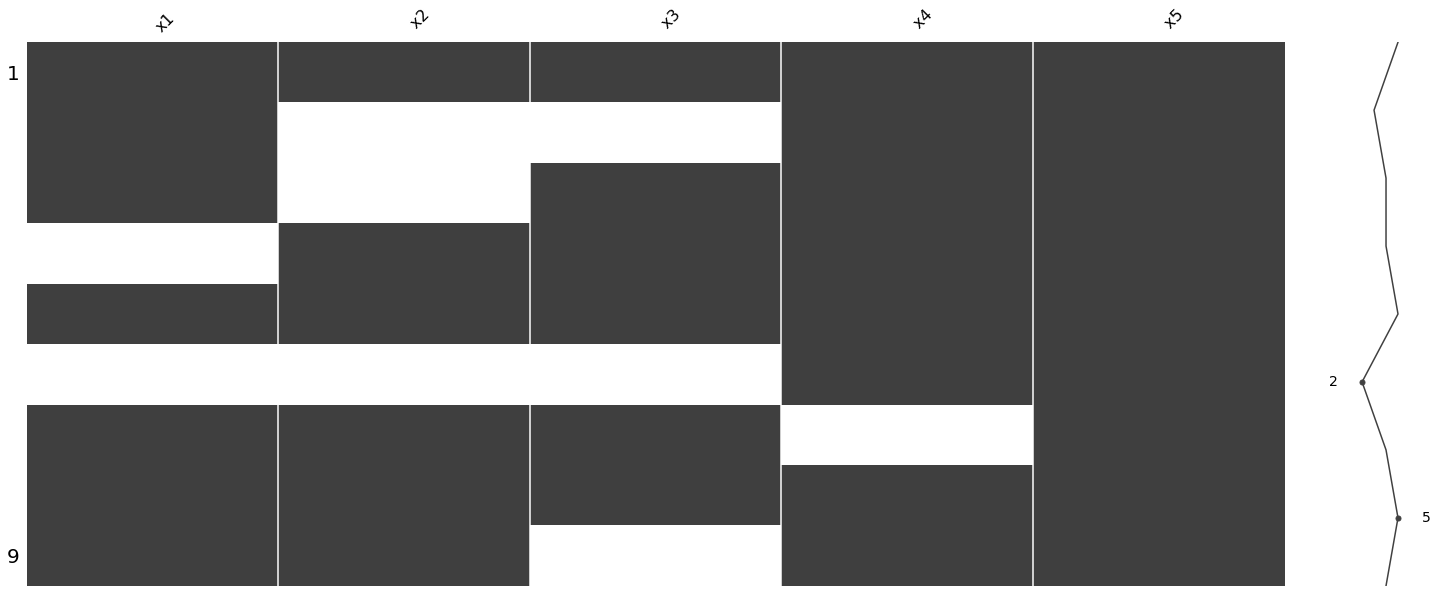

In [56]:
# %pip install missingno
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 결측 데이터를 시각화하는 함수
# 결측 데이터는 흰색, 아닌 데이터는 검은색
msno.matrix(df)
plt.show()

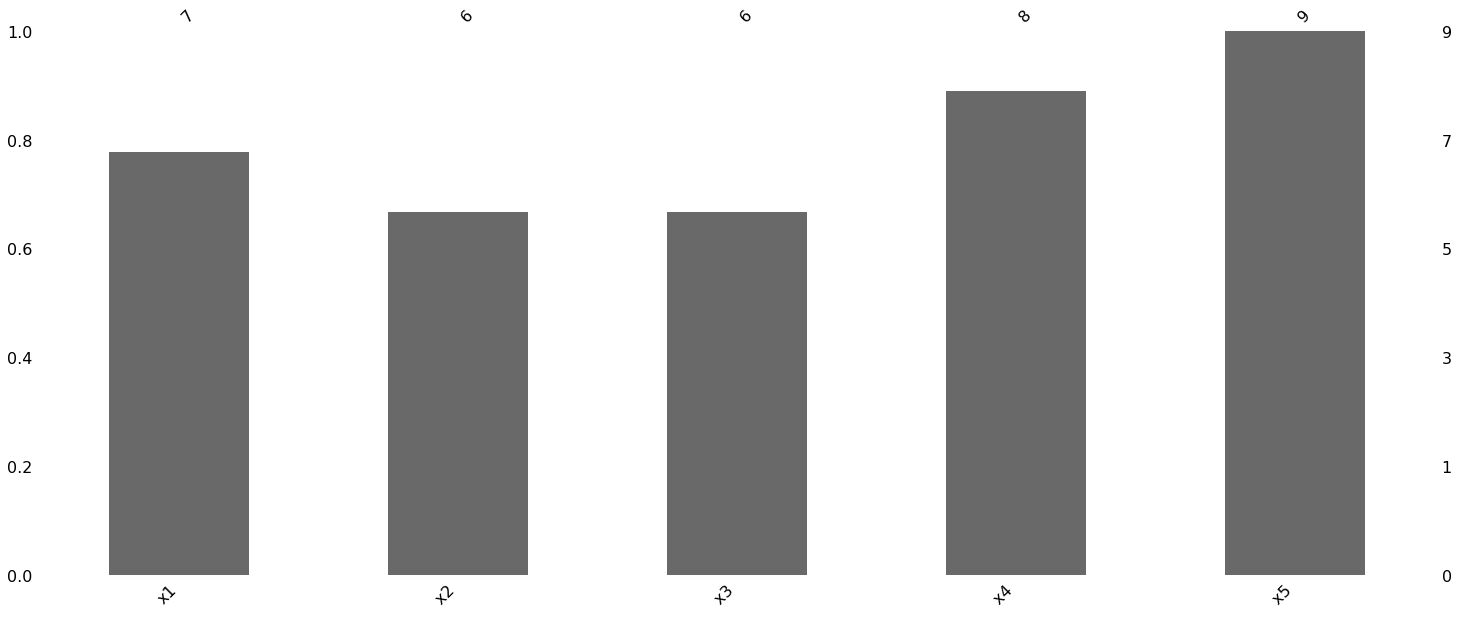

In [57]:
# bar 그래프 이용해서 결측치 유무 확인
msno.bar(df)
plt.show()

## 타이타닉을 통한 예시

In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
# 타이타닉 생존자 데이터를 이용한 missingno 쓰임새를 알아보자
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


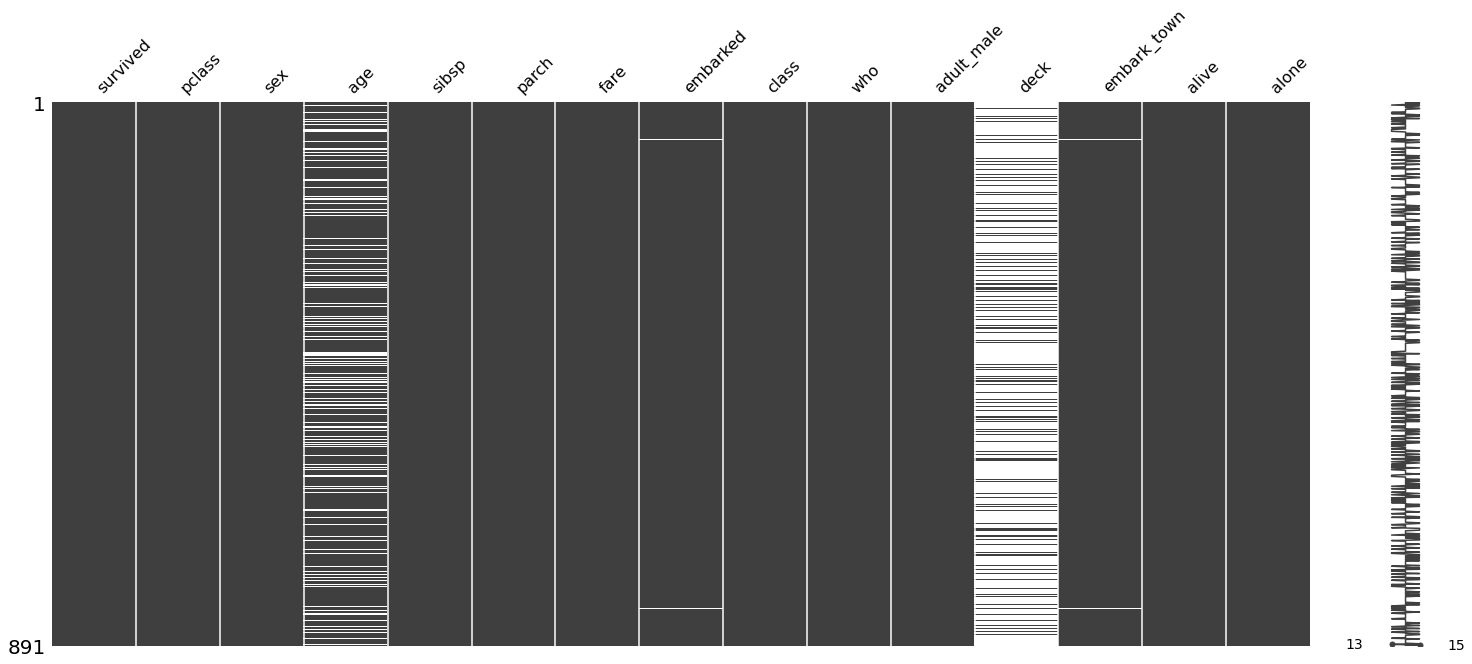

In [61]:
msno.matrix(titanic)
plt.show()

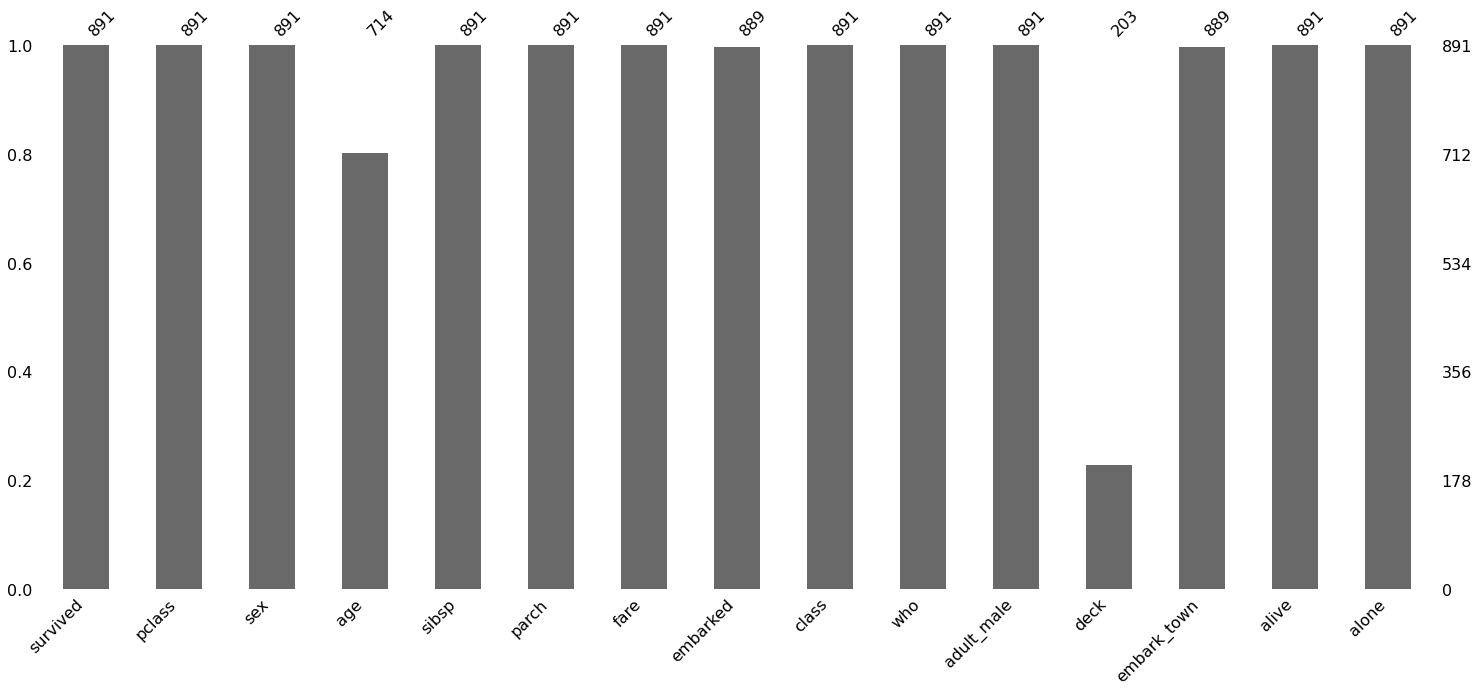

In [62]:
msno.bar(titanic)
plt.show()

## 결측 데이터 대체
- sklearn - SimpleImputer(평균, 중앙, 최빈)
- fit transform 대체 값이 채워진 데이터 프레임 생성 가능
- mean, median, most_frequent

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [65]:
# mean, median, most_frequent
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df))
df

,0,1,2,3,4
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,0.1,1.0,2019-01-02,B
2,3.0,0.1,3.0,2019-01-03,C
3,1.0,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,1.0,0.1,1.0,2019-01-06,C
6,7.0,0.7,7.0,2019-01-01,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,1.0,2019-01-09,C


# 다중 대체법
- 3단계로 구성, 가능한 대체 값의 분포에서 추출된 서로 다른 값으로 결측치를 처리한 복수의 데이터셋을 생성한 뒤(imputation phase), 이들 데이터셋에 대하여 각각 분석을 수행하고(analysis phase), 그 결과 얻은 모수의 추정량과 표본오차를 통합하여(pooling phase) 하나의 분석 결과를 제시하는 방법
- 다중 대체법을 일차적으로 활용, 또한 다중 대체법을 사용할 때 결측 발생에 영향을 줄 수 있는 가능한 많은 변수를 설문조사 결과를 통해 얻어 결측치 대체에 사용하면 성능의 향상에 기대할 수 있음

## 다중 대체법
- 결측치를 제외한 나머지 변수들로 해당 결측치를 예측
- 이것을 여러 번 반복을 통해 신뢰성 있는 대처 값을 넣어 줌
- 지금까지 나와있는 대처 방법 중에서는 제일 성능이 좋다고 함

### 사용법

In [75]:
# %pip install impyute
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from impyute.imputation.cs import mice


In [69]:
test = pd.read_csv('/Users/benny/Desktop/datascience/house-prices-advanced-regression-techniques/test.csv', encoding='cp949')
train = pd.read_csv('/Users/benny/Desktop/datascience/house-prices-advanced-regression-techniques/train.csv', encoding='cp949')

In [70]:
# 다중 대체를 하기 위해선 train과 test를 합치는 작업이 필요. 그러기 위해 두 데이터 프레임이 같아야 함
train_no_salep_price = train.drop(['SalePrice'], axis=1)
total = pd.concat([train_no_salep_price, test], axis=0, ignore_index=True)
total

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<AxesSubplot:>

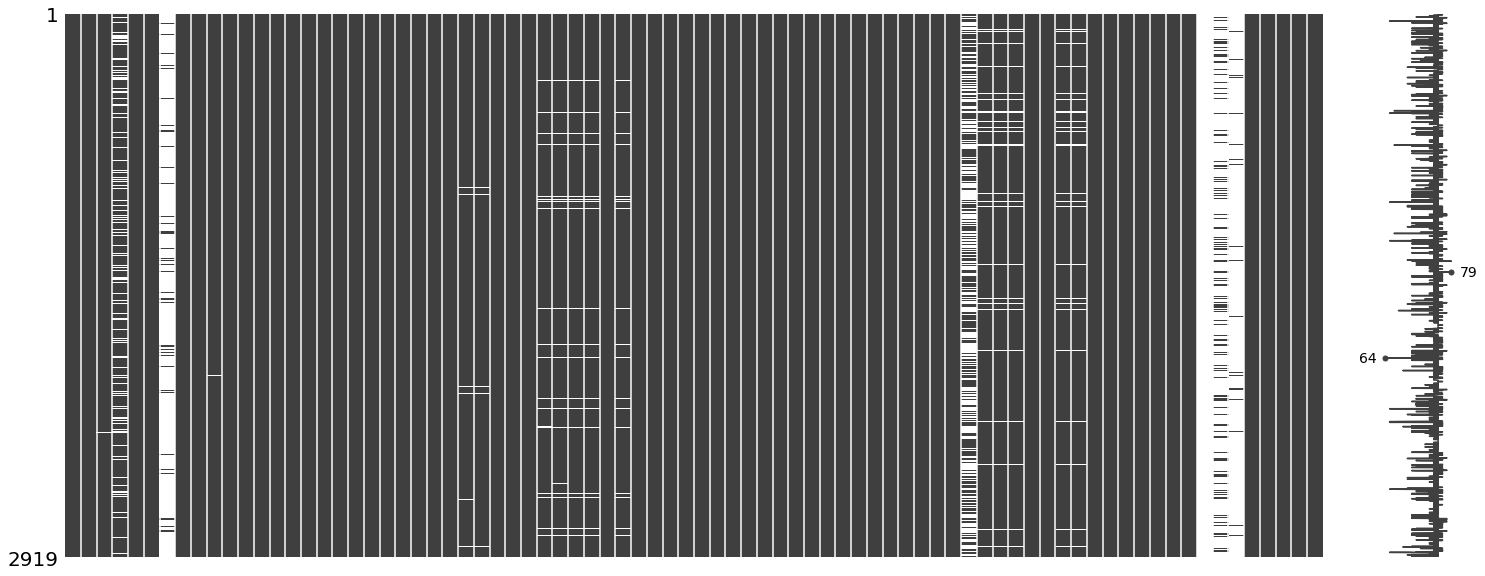

In [71]:
import missingno as msno
msno.matrix(total)

In [73]:
# total을 더미화
# 더미화하는 이유는 범주형 변수는 기계학습을 할 때 다룰 수 없기 때문에
dummy = pd.get_dummies(total)
dummy

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [76]:
total_impute = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(dummy))
total_impute

,0,1,2,3,4,5,6,7,8,9,...,279,280,281,282,283,284,285,286,287,288
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2915,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2916,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2917,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

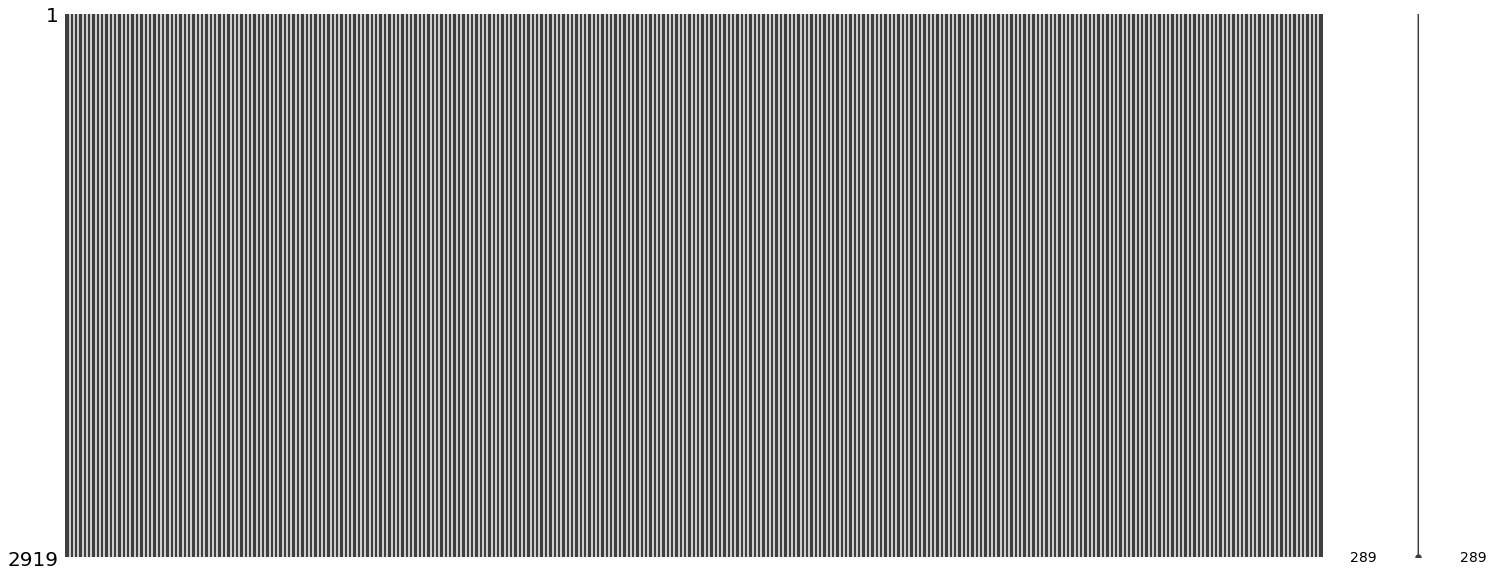

In [77]:
msno.matrix(total_impute)

In [ ]:
msno.bar(total_impute)